In [ ]:
import pandas as pd
import pandas_datareader.data as reader
import datetime as dt
import statsmodels.api as sm
import matplotlib.pyplot as plt
import getFamaFrenchFactors as gff
import seaborn as sns

Let rf be the risk free rate

For CAPM we know:



capital_asset_pricing_model.svg

Now we define the timeframe 

In [ ]:
BATAINDIA_daily = reader.DataReader(['BATAINDIA.NS','^NSEI'],'yahoo', start= '2020-4-1', end=  '2022-3-31')['Adj Close']
BATAINDIA_daily.head()

Symbols,BATAINDIA.NS,^NSEI
Date,,
2020-04-01,1142.913696,8253.799805
2020-04-03,1143.922363,8083.799805
2020-04-07,1197.384033,8792.200195
2020-04-08,1191.283691,8748.750000
2020-04-09,1193.589233,9111.900391


In [ ]:
BERGEPAINT_daily = reader.DataReader(['BERGEPAINT.NS','^NSEI'], 'yahoo', start = '2020-4-1', end = '2022-3-31')['Adj Close']
BERGEPAINT_daily.head()

Symbols,BERGEPAINT.NS,^NSEI
Date,,
2020-04-01,479.424316,8253.799805
2020-04-03,444.914062,8083.799805
2020-04-07,475.209717,8792.200195
2020-04-08,459.640442,8748.750000
2020-04-09,470.350464,9111.900391


In [ ]:
mtl_ret_BATA_NSE = BATAINDIA_daily.resample('M').ffill().pct_change()
mtl_ret_BATA_NSE= mtl_ret_BATA_NSE.dropna(axis = 0)
mtl_ret_BATA_NSE.head()

Symbols,BATAINDIA.NS,^NSEI
Date,,
2020-05-31,-0.028971,-0.028357
2020-06-30,-0.014635,0.075342
2020-07-31,-0.019981,0.074873
2020-08-31,0.024447,0.028361
2020-09-30,0.014857,-0.012290


In [ ]:
mtl_ret_BERGEPAINT_NSE = BERGEPAINT_daily.resample('M').ffill().pct_change()
mtl_ret_BERGEPAINT_NSE = mtl_ret_BERGEPAINT_NSE.dropna(axis = 0)
mtl_ret_BERGEPAINT_NSE.head()

Symbols,BERGEPAINT.NS,^NSEI
Date,,
2020-05-31,-0.032750,-0.028357
2020-06-30,0.004372,0.075342
2020-07-31,0.066005,0.074873
2020-08-31,0.021273,0.028361
2020-09-30,0.086107,-0.012290


In [ ]:
X1 = mtl_ret_BATA_NSE['^NSEI']
y1 = mtl_ret_BATA_NSE['BATAINDIA.NS']
X1_sm = sm.add_constant(X1)

In [ ]:
model1 = sm.OLS(y1, X1_sm)

In [ ]:
results = model1.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           BATAINDIA.NS   R-squared:                       0.272
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     7.859
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0106
Time:                        14:53:07   Log-Likelihood:                 32.006
No. Observations:                  23   AIC:                            -60.01
Df Residuals:                      21   BIC:                            -57.74
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0040      0.015     -0.261      0.797      -0.036       0.028
^NSEI          0.8815      0.314      2.803      0.011       0.228       1.535
==============================================================================
Omnibus:                        0.757   Durbin-Watson:                   2.344
Prob(Omnibus):                  0.685   Jarque-Bera (JB):                0.795
Skew:                           0.311   Prob(JB):                        0.672
Kurtosis:                       2.334   Cond. No.                         24.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

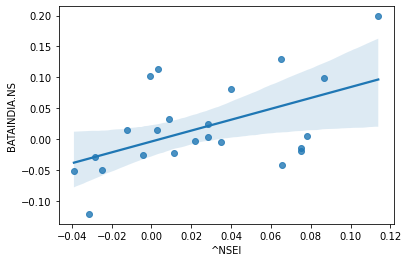

In [ ]:
sns.regplot(x = '^NSEI', y = 'BATAINDIA.NS', data = mtl_ret_BATA_NSE)
plt.show()

Now performing with the risk free rate

In [ ]:
rf = reader.DataReader('F-F_Research_Data_Factors','famafrench', '2020-4-1', '2022-3-31')[0].RF

In [ ]:
rf= rf[1:]

In [ ]:
mtl_ret_BATA_NSE['BATAINDIA.NS-rf'], mtl_ret_BATA_NSE['^NSEI-rf'] = mtl_ret_BATA_NSE['BATAINDIA.NS']- rf.values, mtl_ret_BATA_NSE['^NSEI'] - rf.values

In [ ]:
mtl_ret_BATA_NSE.head()

Symbols,BATAINDIA.NS,^NSEI,BATAINDIA.NS-rf,^NSEI-rf
Date,,,,
2020-05-31,-0.028971,-0.028357,-0.038971,-0.038357
2020-06-30,-0.014635,0.075342,-0.024635,0.065342
2020-07-31,-0.019981,0.074873,-0.029981,0.064873
2020-08-31,0.024447,0.028361,0.014447,0.018361
2020-09-30,0.014857,-0.012290,0.004857,-0.022290


In [ ]:
X1 = mtl_ret_BATA_NSE['^NSEI-rf']
y1 = mtl_ret_BATA_NSE['BATAINDIA.NS-rf']
X1_sm = sm.add_constant(X1)

In [ ]:
model1 = sm.OLS(y1, X1_sm)

In [ ]:
results = model1.fit()

In [ ]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        BATAINDIA.NS-rf   R-squared:                       0.275
Model:                            OLS   Adj. R-squared:                  0.240
Method:                 Least Squares   F-statistic:                     7.948
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0103
Time:                        14:53:09   Log-Likelihood:                 31.974
No. Observations:                  23   AIC:                            -59.95
Df Residuals:                      21   BIC:                            -57.68
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0052      0.015     -0.348      0.731      -0.036       0.026
^NSEI-rf       0.9077      0.322      2.819      0.010       0.238       1.577
==============================================================================
Omnibus:                        0.698   Durbin-Watson:                   2.328
Prob(Omnibus):                  0.705   Jarque-Bera (JB):                0.753
Skew:                           0.295   Prob(JB):                        0.686
Kurtosis:                       2.337   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**As the obtained p value is less than 0.05 we can assume this CAPM model to be a good fit BATAINDIA over NSE**

In [ ]:
#Performing the same for BERGEPAINT
mtl_ret_BERGEPAINT_NSE['BERGEPAINT.NS-rf'], mtl_ret_BERGEPAINT_NSE['^NSEI-rf'] = mtl_ret_BERGEPAINT_NSE['BERGEPAINT.NS']- rf.values, mtl_ret_BERGEPAINT_NSE['^NSEI'] - rf.values

In [ ]:
mtl_ret_BERGEPAINT_NSE.head()

Symbols,BERGEPAINT.NS,^NSEI,BERGEPAINT.NS-rf,^NSEI-rf
Date,,,,
2020-05-31,-0.032750,-0.028357,-0.042750,-0.038357
2020-06-30,0.004372,0.075342,-0.005628,0.065342
2020-07-31,0.066005,0.074873,0.056005,0.064873
2020-08-31,0.021273,0.028361,0.011273,0.018361
2020-09-30,0.086107,-0.012290,0.076107,-0.022290


In [ ]:
X2 = mtl_ret_BERGEPAINT_NSE['^NSEI-rf']
y2 = mtl_ret_BERGEPAINT_NSE['BERGEPAINT.NS-rf']
X2_sm = sm.add_constant(X2)

In [ ]:
model2 = sm.OLS(y2, X2_sm)

In [ ]:
results = model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       BERGEPAINT.NS-rf   R-squared:                       0.134
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     3.245
Date:                Mon, 22 Aug 2022   Prob (F-statistic):             0.0860
Time:                        14:53:09   Log-Likelihood:                 30.942
No. Observations:                  23   AIC:                            -57.88
Df Residuals:                      21   BIC:                            -55.61
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0012      0.016     -0.078      0.938      -0.033       0.031
^NSEI-rf       0.6066      0.337      1.801      0.086      -0.094       1.307
==============================================================================
Omnibus:                        2.082   Durbin-Watson:                   2.680
Prob(Omnibus):                  0.353   Jarque-Bera (JB):                1.750
Skew:                           0.562   Prob(JB):                        0.417
Kurtosis:                       2.250   Cond. No.                         24.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Obtained P value is greater than 0.05 hence the model can't be assumed to be a good fit**